Check the distributions prior and post training.

From `check_distributions_features.ipynb` in ai4pex-cnn repo.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Some functions

In [4]:
def dataset_to_dataframe(directory, fn, time_slice=None):
    ds = xr.open_dataset(directory + fn)
    if time_slice is not None:
        ds = ds.isel(t=time_slice)
    df = ds.to_dataframe()
    return df

## Analysis

In [7]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
fn = 'preprocessed_SO_JET_data_asinh_transform.nc'
df = dataset_to_dataframe(directory, fn, time_slice=slice(1, 2))
df

sa       vor  eke_tendency  eke_shift  \
r t                   y_c x_c                                                
0 0061-01-03 00:00:00 0   0   -1.748660  0.000002  4.038424e-08   0.010134   
                          1   -1.727356  0.000010  2.950860e-08   0.007709   
                          2   -1.688776  0.000012 -1.018506e-08   0.003006   
                          3   -1.722296  0.000009 -1.535232e-08   0.001457   
                          4   -1.739357  0.000008 -6.081492e-09   0.001414   
...                                 ...       ...           ...        ...   
                      39  35   0.443955 -0.000005  9.025694e-10   0.009562   
                          36   0.413348 -0.000004  3.302249e-10   0.008665   
                          37   0.418698 -0.000003  4.605262e-10   0.008099   
                          38   0.383683 -0.000003  1.689994e-09   0.008175   
                          39   0.359762 -0.000004  4.335109e-09   0.009068   

                                    mke   mke_log  vor_asinh  eke_shift_log  \
r t                   y_c x_c                                                 
0 0061-01-03 00:00:00 0   0    0.018777 -0.314973   0.092716      -1.028492   
                          1    0.013453 -0.519626   0.675097      -1.226759   
                          2    0.009868 -0.709873   0.752359      -1.909485   
                          3    0.006597 -0.957047   0.581651      -2.434270   
                          4    0.003584 -1.331519   0.530472      -2.456348   
...                                 ...       ...        ...            ...   
                      39  35   0.001149 -2.029853  -0.384033      -1.070605   
                          36   0.000465 -2.585343  -0.273351      -1.141987   
                          37   0.000159 -3.244382  -0.215212      -1.190971   
                          38   0.000318 -2.818446  -0.239227      -1.184193   
                          39   0.000806 -2.247349  -0.273327      -1.109037   

                               eke_tendency_asinh      gphit   glamt  \
r t                   y_c x_c                                          
0 0061-01-03 00:00:00 0   0              0.040373 -46.224777   3.375   
                          1              0.029504 -46.224777   3.625   
                          2             -0.010185 -46.224777   3.875   
                          3             -0.015352 -46.224777   4.125   
                          4             -0.006081 -46.224777   4.375   
...                                           ...        ...     ...   
                      39  35             0.000903 -39.065640  12.125   
                          36             0.000330 -39.065640  12.375   
                          37             0.000461 -39.065640  12.625   
                          38             0.001690 -39.065640  12.875   
                          39             0.004335 -39.065640  13.125   

                               gdept_1d   gdept_0  z_c  
r t                   y_c x_c                           
0 0061-01-03 00:00:00 0   0    5.033582  5.033582    0  
                          1    5.033582  5.033582    0  
                          2    5.033582  5.033582    0  
                          3    5.033582  5.033582    0  
                          4    5.033582  5.033582    0  
...                                 ...       ...  ...  
                      39  35   5.033582  5.033582    0  
                          36   5.033582  5.033582    0  
                          37   5.033582  5.033582    0  
                          38   5.033582  5.033582    0  
                          39   5.033582  5.033582    0  

[1600 rows x 14 columns]

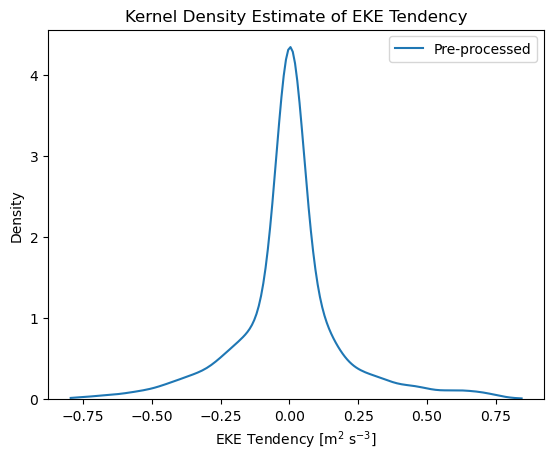

In [9]:
sns.kdeplot(df['eke_tendency_asinh'], label='Pre-processed', cut=0)

plt.title('Kernel Density Estimate of EKE Tendency')
plt.xlabel('EKE Tendency [m$^2$ s$^{-3}$]')
plt.ylabel('Density')
plt.legend()

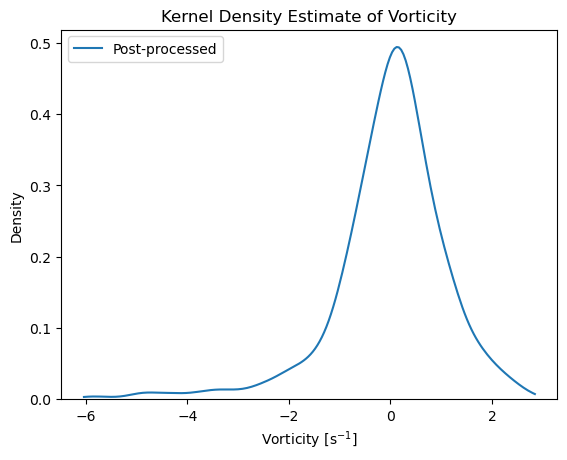

In [10]:
sns.kdeplot(df['vor_asinh'], label='Post-processed', cut=0)

plt.title('Kernel Density Estimate of Vorticity')
plt.xlabel('Vorticity [s$^{-1}$]')
plt.ylabel('Density')
plt.legend()